In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r"C:\Users\DRG\Desktop\jupyter notebook\SVMtrain.csv")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [13]:
#checking null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [15]:
pd.crosstab([df.Sex, df.Survived],df.Pclass)

Pclass            1   2    3
Sex    Survived             
Male   0         77  91  300
       1         45  17   47
female 0          3   6   72
       1         89  70   72

In [16]:
#dropping unneccsary columns
df.drop(['PassengerId','Embarked'],inplace=True,axis=1)

In [17]:
#encoding categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])

<Axes: >

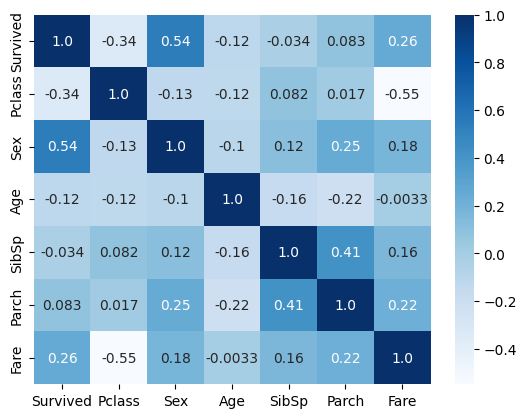

In [18]:
#checking correlation
sns.heatmap(df.corr(),annot = True, fmt='.2',cmap = 'Blues')

In [19]:
#spliting data for training
X = df.drop(columns = 'Survived', axis = 1)
y = df['Survived']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [21]:
#building decision tree model
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)

In [22]:
model.fit(X_train, y_train)

#predicting values by the model
y_pred = model.predict(X_test)

In [23]:
#checking the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.8202247191011236

In [24]:
confusion_matrix(y_test, y_pred)

array([[92, 17],
       [15, 54]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

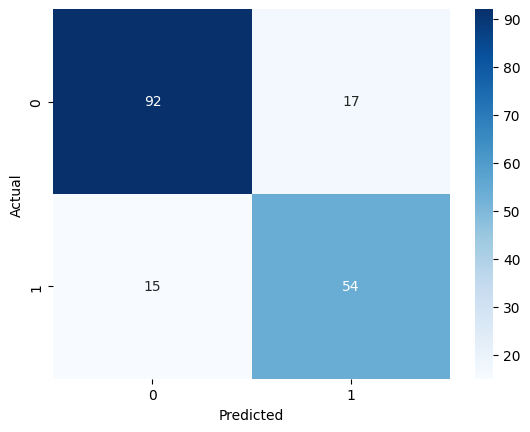

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues', fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Conclusion:
- The model performs better in identifying passengers who did not survive (True Negatives) compared to those who survived.
- The Precision (Survived) :
  This means that when the model predicts survival, it is correct 76% of the time.

- The Recall (Survived) is:

  This shows the model captures 78% of actual survivors.

The model shows balanced performance but could be improved further by reducing false negatives, possibly through hyperparameter tuning or class balancing techniques.

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



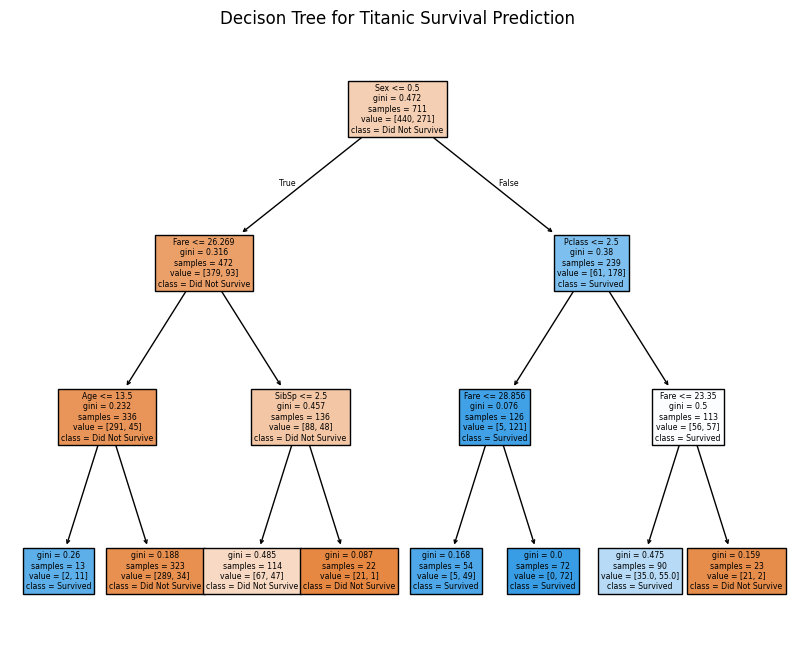

In [29]:
plt.figure(figsize=(10,8))
tree.plot_tree(model, filled = True, feature_names = X.columns, class_names = ['Did Not Survive', 'Survived'])
plt.title('Decison Tree ')
plt.show()